### 資料集格式
#### Students’ Adaptability Level in school, college and university
. About this file:  Students’ Adaptability Level in school, college and university  
. Gender: Gender type of student  
. Age: Age range of the student  
. Education Level: Education institution level  
. Institution Type: Education institution type  
. IT Student: Studying as IT student or not  
. Location in Town: Is student location in town  
. Load-shedding: Level of load shedding  
. Financial Condition: Financial condition of family  
. Internet Type: Internet type used mostly in device  
. Network Type: Network connectivity type  
. Class Duration: Daily class duration  
. Self LMS: Institution’s own LMS availability  
. Device: Device used mostly in class  
. Adaptability Level: Adaptability level of the student  

In [1]:
import typing 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 檔案路徑
target_file: str = "students_adaptability_level_online_education.csv"
target_folder: str = "./dataset/"
target_path: str = f"{target_folder}{target_file}"


In [3]:
# 將 dataset 讀入 dataframe
df: pd.DataFrame = pd.read_csv(target_path)
df.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn import tree
import random
import seaborn as sns

## 112524013 薛孟君

### Step 1
使用 Decision Tree 尋找影響 Adaptivity Level 的主要特徵  
Using Decision Tree to find the primary features that impact Adaptivity Level.

In [10]:
target_feature: str = 'Adaptivity Level'
X = df.drop(columns=[target_feature])
y = df[target_feature]


In [11]:
df_columns = list(df.columns)
df_columns.remove(target_feature)

X = pd.get_dummies(X, columns=df_columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [12]:
# create a RandomForest model
model = RandomForestClassifier(random_state=87)

# use data to fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=87)

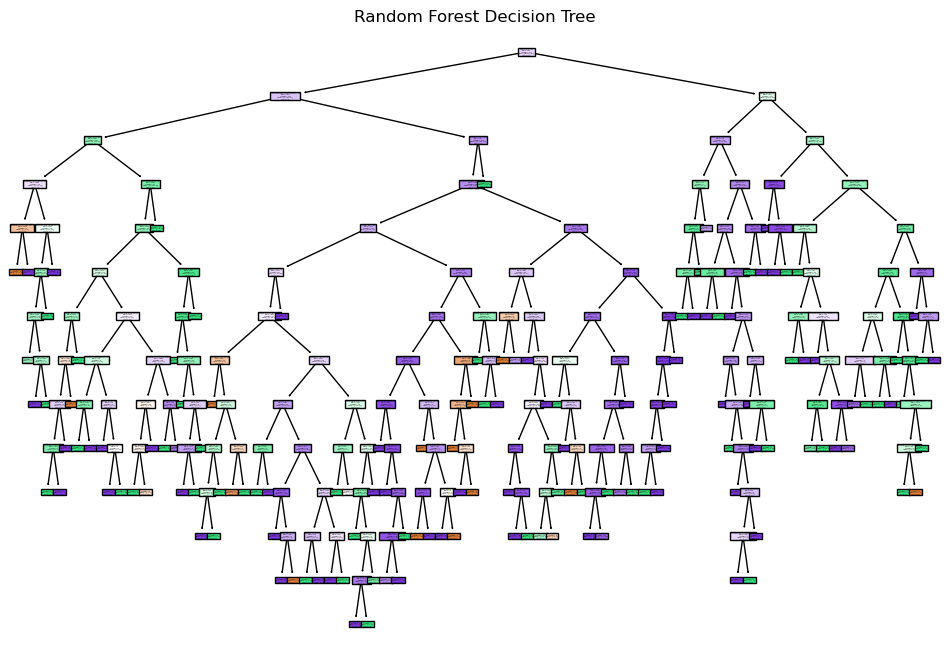

In [13]:
target_tree = model.estimators_[0]

plt.figure(figsize=(12, 8))
tree.plot_tree(target_tree, feature_names=X_train.columns, class_names=True, filled=True)
plt.title(f"Random Forest Decision Tree")
plt.show()

In [14]:

# get feature_importances
feature_importances = model.feature_importances_

# create a DataFrame contains feature_importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# sort by feature_importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# get top ten features
top_ten_features = feature_importance_df.head(10)

print(top_ten_features)

                            Feature  Importance
27                 Class Duration_0    0.067610
0                        Gender_Boy    0.051272
1                       Gender_Girl    0.047614
28               Class Duration_1-3    0.042325
29               Class Duration_3-6    0.040616
19          Financial Condition_Mid    0.037774
12  Institution Type_Non Government    0.035037
20         Financial Condition_Poor    0.032769
16                     Location_Yes    0.032354
23               Internet Type_Wifi    0.031823


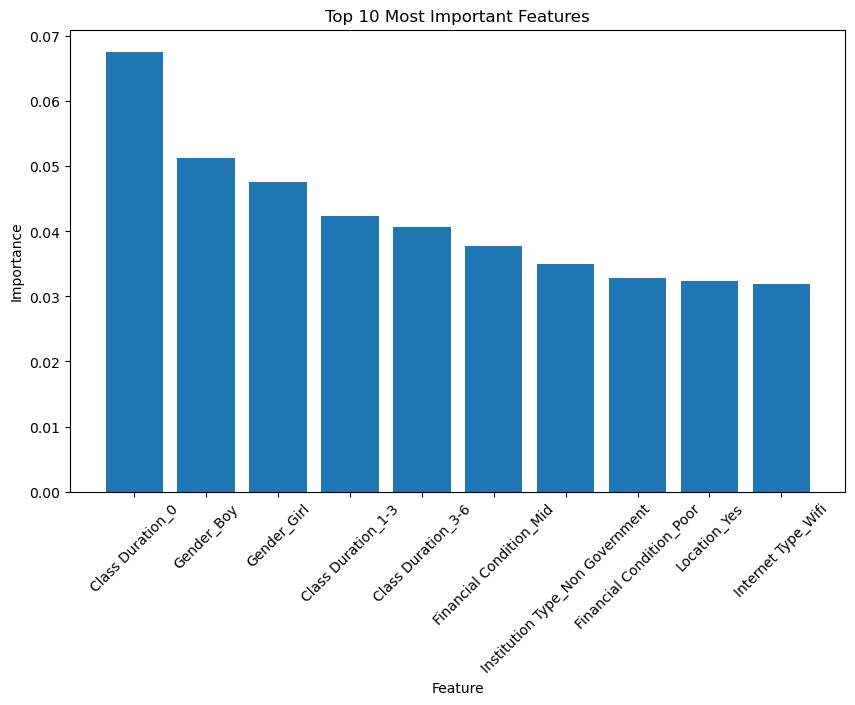

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(top_ten_features['Feature'], top_ten_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45)
plt.show()

### Step 2
將主要特徵 'Class Duration','Gender','Financial Condition' 列出，觀察不同項目間的關聯  
ist the main features 'Class Duration,' 'Gender,' and 'Financial Condition' to observe the relationships between different items.

In [16]:
subset_data: pd.DataFrame = df[['Class Duration','Gender','Financial Condition',target_feature]]
subset_data.head(3)

,Class Duration,Gender,Financial Condition,Adaptivity Level
0,3-6,Boy,Mid,Moderate
1,1-3,Girl,Mid,Moderate
2,1-3,Girl,Mid,Moderate


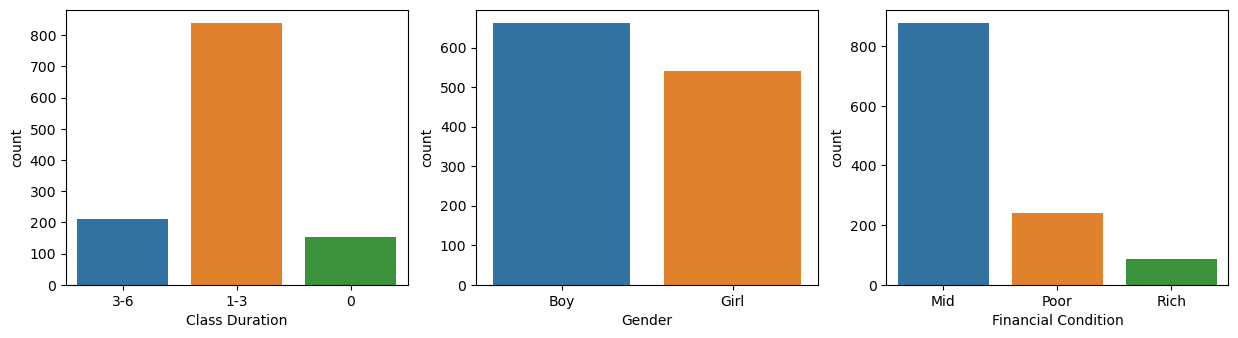

In [17]:
count = 1
plt.figure(figsize = (15,25))

for feature in subset_data :
    plt.subplot(6,3,count)
    sns.countplot(x = feature , data = subset_data)
    count +=1
    if count > 3 : break

In [18]:
# compare between ['Class Duration', 'Gender', 'Financial Condition']
compare_list: list = list(subset_data.columns)
compare_list.remove(target_feature)

print('The Chi-Squared Test of Independence:', end='\n\n')

for compare_item in compare_list:
    print(f'compare between {compare_item} and {target_feature}:')
    chi2, p, _, _ = chi2_contingency(pd.crosstab(subset_data[compare_item], subset_data[target_feature]))

    print("Chi-squared value:", chi2)
    print("p-value:", p)
    
    print()


The Chi-Squared Test of Independence:

compare between Class Duration and Adaptivity Level:
Chi-squared value: 225.91788519948977
p-value: 9.983962891861e-48

compare between Gender and Adaptivity Level:
Chi-squared value: 13.451358056255899
p-value: 0.0011997056689743298

compare between Financial Condition and Adaptivity Level:
Chi-squared value: 236.86479235811265
p-value: 4.391228197442381e-50



#### => There are strong relation between Class Duration and Adaptivity Level, Financial Condition and Adaptivity Level.

### step 3
將資料輸出為表格  
Output the data as a table.  

In [19]:
subset_data = subset_data.drop(['Gender'], axis=1)

In [20]:

plot_dict: list = [
    {
    'type':'high',
    'color_mapping': {'Low': 'lightgrey', 'Moderate': 'lightgrey', 'High': 'dodgerblue'},
    'plot_range':[0,100],
    'plot_size':3
    },
    {
    'type':'moderate',
    'color_mapping': {'Low': 'lightgrey', 'Moderate': 'dodgerblue', 'High': 'lightgrey'},
    'plot_range':[0,600],
    'plot_size':3
    },
    {
    'type':'low',
    'color_mapping': {'Low': 'dodgerblue', 'Moderate': 'lightgrey', 'High': 'lightgrey'},
    'plot_range':[0,400],
    'plot_size':3
    },
    ]

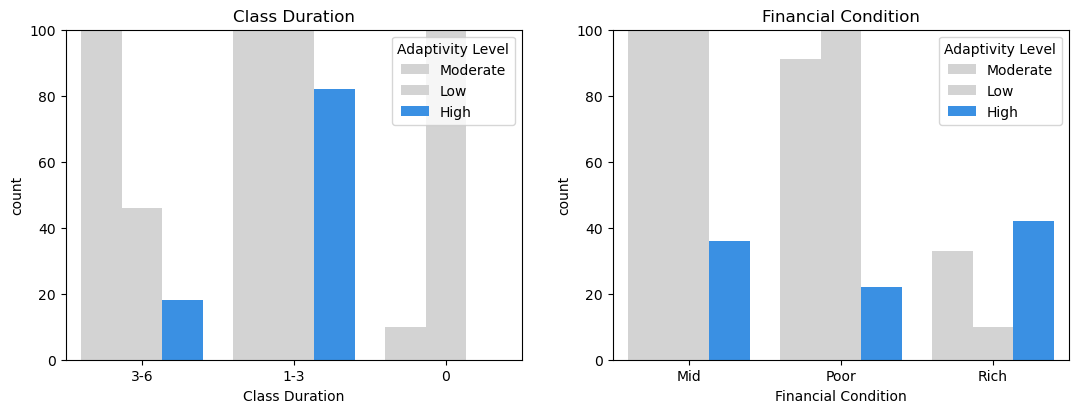

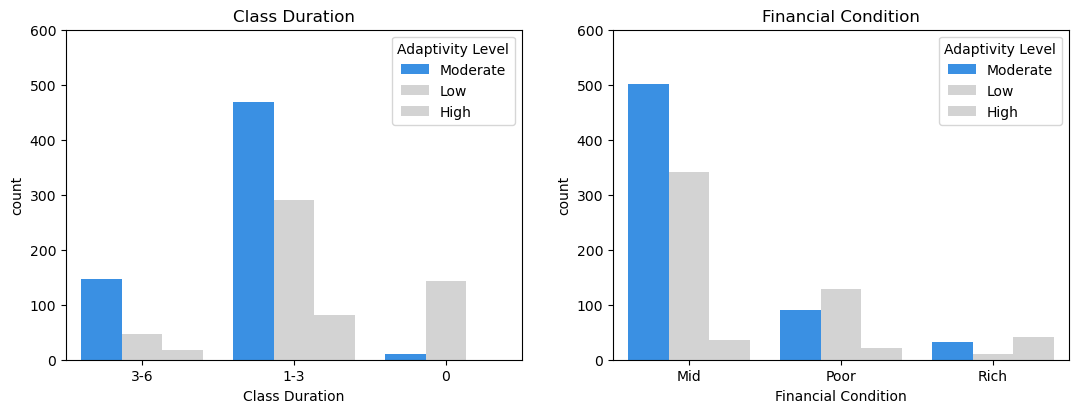

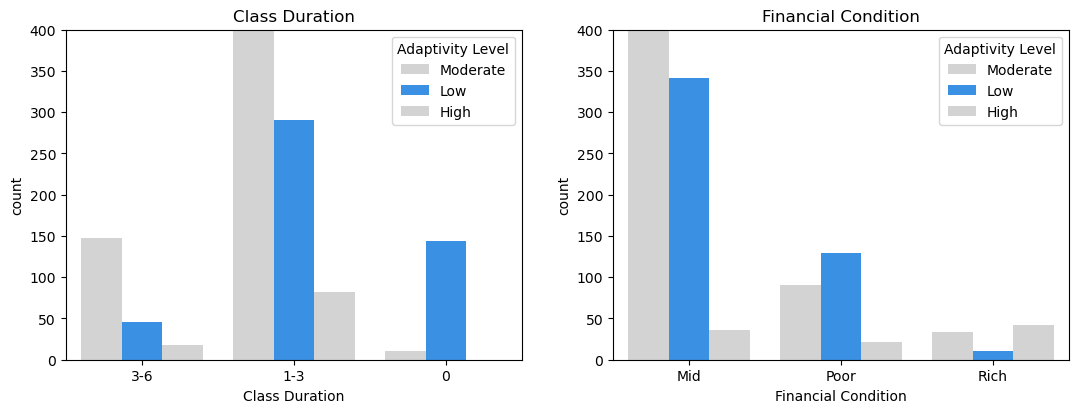

In [21]:
for item in plot_dict:
    count = 1
    plt.figure(figsize = (20,30))
    loop_break: bool = False
    
    for feature in subset_data:
        plt.subplot(6,item['plot_size'],count)
        sns.countplot(x = feature , hue = 'Adaptivity Level', data = subset_data, palette = item['color_mapping'])
        
        plt.ylim(item['plot_range'])
        plt.title(feature)
        
        count += 1
        
        if loop_break: break
        loop_break = True

### Conclusion
1. 可以發現 Adaptivity Level 與 Financial Condition 為正相關，家裡越有錢的學生普遍會有更好的表現。  
We can see that Adaptivity Level and Financial Condition are related in a positive way.   
Students who have more money tend to do better.

2. 可以發現不花時間上課的學生不存在好表現的案例。而花費超過3小時上課的學生表現反而沒有比1~3小時的學生好。  
You can see that students who don't spend time in class don't do well.   
And students who spend more than 3 hours in class actually don't perform better than students who spend 1 to 3 hours in class.  
 